In [28]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('Decision_Tree_Dataset.csv',
                 sep= ',',header=0)

In [20]:
df.rename(columns={'1':'Initial payment','2':'Last payment','3':'Credit Score','4':'House Number'},inplace=True)

In [22]:
df.drop(columns='sum',inplace=True,axis=1)

In [24]:
df.rename(columns={'Unnamed: 5':'Result'},inplace=True)

In [25]:
df

,Initial payment,Last payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes
...,...,...,...,...,...
995,413,14914,523,4683,No
996,359,14423,927,4838,No
997,316,14872,613,4760,No
998,305,14926,897,4572,No


In [26]:
df.describe()

,Initial payment,Last payment,Credit Score,House Number
count,1000.00000,1000.00000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000
std,115.81539,1440.15617,259.796059,565.164179
min,100.00000,10005.00000,100.000000,3003.000000
25%,195.00000,11201.50000,302.000000,3545.000000
50%,289.50000,12450.00000,516.500000,4041.500000
75%,398.00000,13678.25000,753.500000,4507.000000
max,500.00000,14996.00000,997.000000,5000.000000


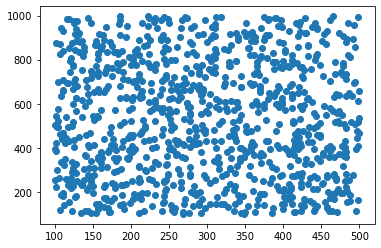

In [35]:
plt.scatter(df['Initial payment'],df['Credit Score'])
plt.show()

In [37]:
correlation = df.corr(method='pearson')

<AxesSubplot:>

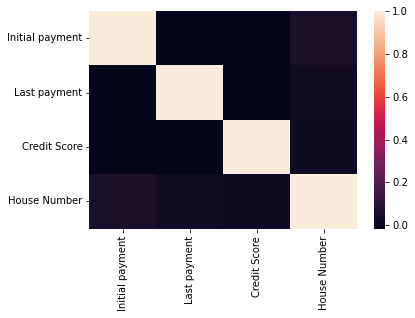

In [39]:
import seaborn as sns
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

In [48]:
df

,Initial payment,Last payment,Credit Score,House Number,Result
0,201,10018,250,3046,yes
1,205,10016,395,3044,yes
2,257,10129,109,3251,yes
3,246,10064,324,3137,yes
4,117,10115,496,3094,yes
...,...,...,...,...,...
995,413,14914,523,4683,No
996,359,14423,927,4838,No
997,316,14872,613,4760,No
998,305,14926,897,4572,No


In [51]:
X = df.iloc[:,0:4]
Y = df.iloc[:,4]
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [53]:
X_train.shape

(800, 4)

In [55]:
y_train

675     No
358    yes
159    yes
533     No
678     No
      ... 
855     No
871     No
835     No
792     No
520     No
Name: Result, Length: 800, dtype: object

In [88]:
#CRITERIA = ENTROPY
model_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,random_state=100)
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [89]:
y_pred_entropy = model_entropy.predict(X_test)

In [90]:
acc_score = accuracy_score(y_test,y_pred_entropy)

In [91]:
acc_score

0.93

In [92]:
y_pred_entropy

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'No', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'yes',

In [133]:
#CRITERION GINI
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=5,random_state=100)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [134]:
y_pred_gini = model_gini.predict(X_test)

In [135]:
acc_score_gini = accuracy_score(y_test,y_pred_gini)

In [136]:
acc_score_gini

0.94

[Text(167.4, 190.26, 'X[1] <= 12402.5\ngini = 0.498\nsamples = 800\nvalue = [423, 377]'),
 Text(83.7, 135.9, 'X[1] <= 11898.5\ngini = 0.184\nsamples = 381\nvalue = [39, 342]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 4837.0\ngini = 0.059\nsamples = 297\nvalue = [9, 288]'),
 Text(20.925, 27.180000000000007, 'gini = 0.022\nsamples = 270\nvalue = [3, 267]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.346\nsamples = 27\nvalue = [6, 21]'),
 Text(125.55000000000001, 81.53999999999999, 'X[3] <= 4347.5\ngini = 0.459\nsamples = 84\nvalue = [30, 54]'),
 Text(104.625, 27.180000000000007, 'gini = 0.073\nsamples = 53\nvalue = [2, 51]'),
 Text(146.475, 27.180000000000007, 'gini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 13120.0\ngini = 0.153\nsamples = 419\nvalue = [384, 35]'),
 Text(209.25, 81.53999999999999, 'X[3] <= 3779.5\ngini = 0.405\nsamples = 110\nvalue = [79, 31]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.401\nsamples = 

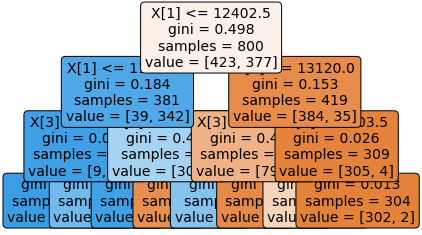

In [137]:
from sklearn import tree
from dtreeviz.trees import *
tree.plot_tree(model_gini,filled=True,rounded=True,fontsize=14)

In [126]:
probs =  X_train.value_counts(normalize=True)

In [128]:
import numpy as np

In [130]:
impurity = 1 - np.sum(np.square(probs))

In [131]:
impurity

0.99875